In [1]:
import numpy
from PIL import Image
import io
import requests
import json
import time

In [2]:
#Init the needed functions for images
def create_and_save_image(width = 64, height = 64 , name = 'random.png'):
    imarray = numpy.random.rand(width,height,3) * 255
    im = Image.fromarray(imarray.astype('uint8')).convert('RGBA')
    im.save(name)

def create_and_save_n_images(width=64 , height = 64, num = 100):
    for n in range(num):
        create_image(width, height, ('random'+str(n+1)+'.png'))
        
def create_bytearray(width=64,height=64):
    imarray = numpy.random.rand(width,height,3)*255
    casted = imarray.astype('uint8')
    return casted

def create_img_from_bytearray(bytearr, colorscheme='RGBA'):
    im=Image.fromarray(bytearr).convert(colorscheme)
    return im

def img_to_bytearray(Image):
    imgByteArr = io.BytesIO()
    Image.save(imgByteArr, format='PNG')
    imgByteArr = imgByteArr.getvalue()
    return imgByteArr

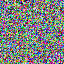

In [16]:
#check
img = create_img_from_bytearray(create_bytearray())
img
#img_to_bytearray(img)

In [17]:
#load trasi infos
url = 'https://phinau.de/trasi'
access_key = 'ehiefoveingereim3ooD2vo8reeb9ooz'
credentials = {'key': access_key}

In [18]:
def send_img_bytearray(nipples):
    file_to_upload = {'image': nipples}
    post_request = requests.post(url, files=file_to_upload, data=credentials)
    return post_request

In [19]:
#check
img = create_img_from_bytearray(create_bytearray())
imgNipples = img_to_bytearray(img)
send_img_bytearray(imgNipples).status_code

200

In [109]:
def get_best_score(ResponseText):
    scores = json.loads(ResponseText)
    return scores[1].get('confidence')

def save_results(bestScore,imgBytes):
    #to be done, only mockup
    print(str(bestScore))

def full_loop():
    img_bytes = img_to_bytearray(create_img_from_bytearray(create_bytearray()))
    response = send_img_bytearray(img_bytes)
    if(response.status_code==200):
        save_results(get_best_score(response.text),img_bytes)
    else:
        #throw errors? Show me something?
        print('upsie, got a', response.status_code)

In [108]:
#check
full_loop()

upsie, got a  429


In [24]:
def execute_timed_full_loops(MaxLoops,Intervall):
    i=0
    while(i < MaxLoops):
        full_loop()
        time.sleep(Intervall)
        i+=1;

In [25]:
execute_timed_full_loops(100, 1.2)

0.0272684
0.04913398
0.03659275
0.0301218
0.04195277
0.08474978
0.05462436
0.04244211
0.03251434
0.02977639
0.03324927
0.05104889
0.12078306
0.04352025
0.03867671
0.05730857
0.03063321
0.0317857
0.06680231
0.04553395
0.03497687
0.03448397
0.05660112
0.04291356
0.05829026
0.04797675
0.02895487
0.02744791
0.02753464
0.05264909
0.04260402
0.02465517
upsie
upsie
upsie
upsie
upsie
upsie
upsie
upsie
upsie
upsie
upsie
upsie
upsie
upsie
0.0333188
0.04190527
0.03480385
0.04698022
0.04767678
0.02792701
0.02442518
0.03805996
0.04236225
0.0302848
0.03612739
0.03157206
0.03029492
0.04490431
0.0305337
0.05061467
0.03895809
0.03170564
0.03103692
0.04058983
0.02995284
0.06653042
0.03957945
0.05776243
0.07351096
0.04878961
0.03556952
0.04014622
0.02697845
upsie
upsie
upsie
upsie
upsie
upsie
upsie
upsie
upsie
upsie
upsie
upsie
upsie
0.09599514
0.0300445
0.02071582
0.02144536
0.03762097
0.0298155
0.02985881
0.03633314
0.04681331
0.01472436
0.05358992
0.02523691
